In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import QuantileTransformer

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop(['CUST_ID'], axis=1, inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Data Exploration


In [3]:
df.shape

(8950, 17)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df.duplicated ().sum ()

0

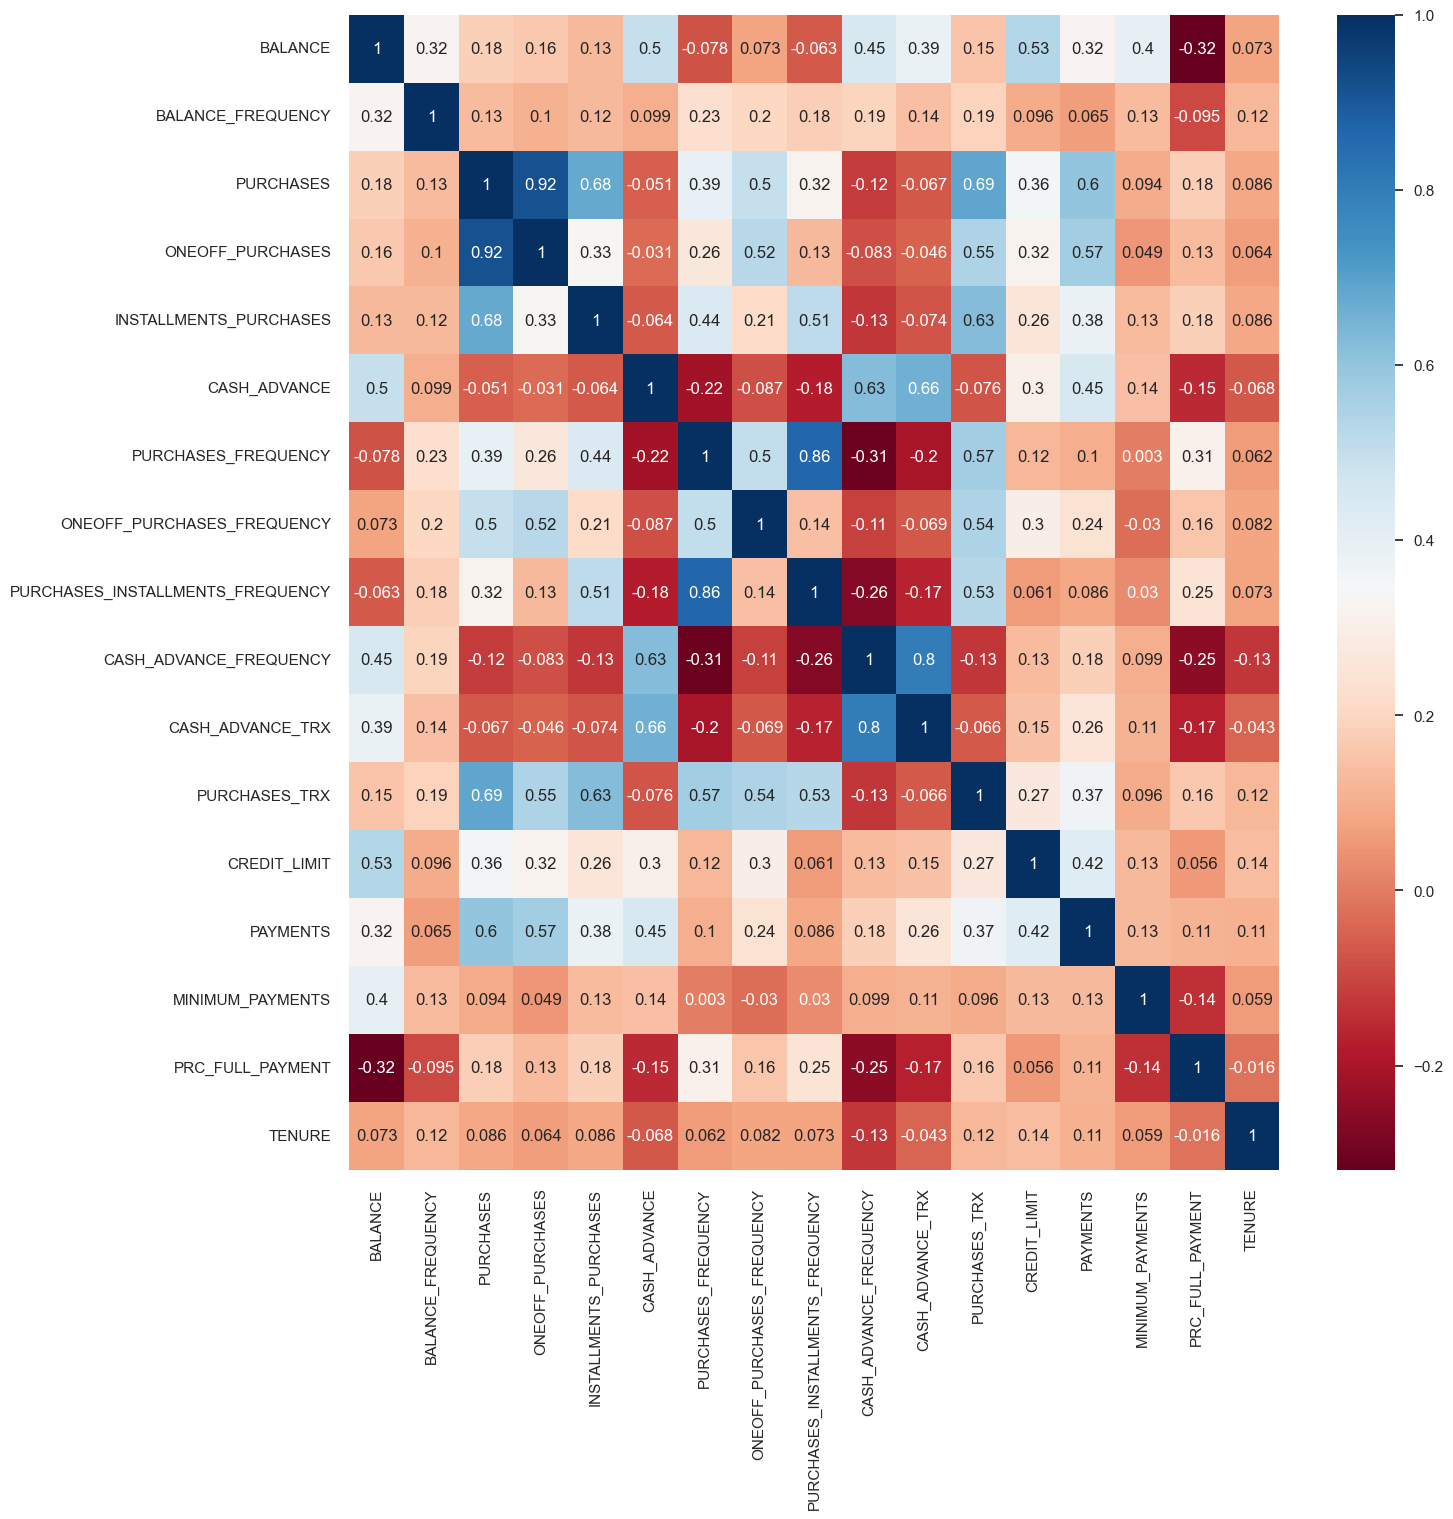

['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']

In [8]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.80):
    # Select only the numeric columns from the DataFrame
    numeric_dataframe = dataframe.select_dtypes(include=['number'])
    
    corr = numeric_dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu",annot=True)
        plt.show()
    
    return drop_list


high_correlated_cols(df, plot=True)

<Figure size 2000x1500 with 0 Axes>

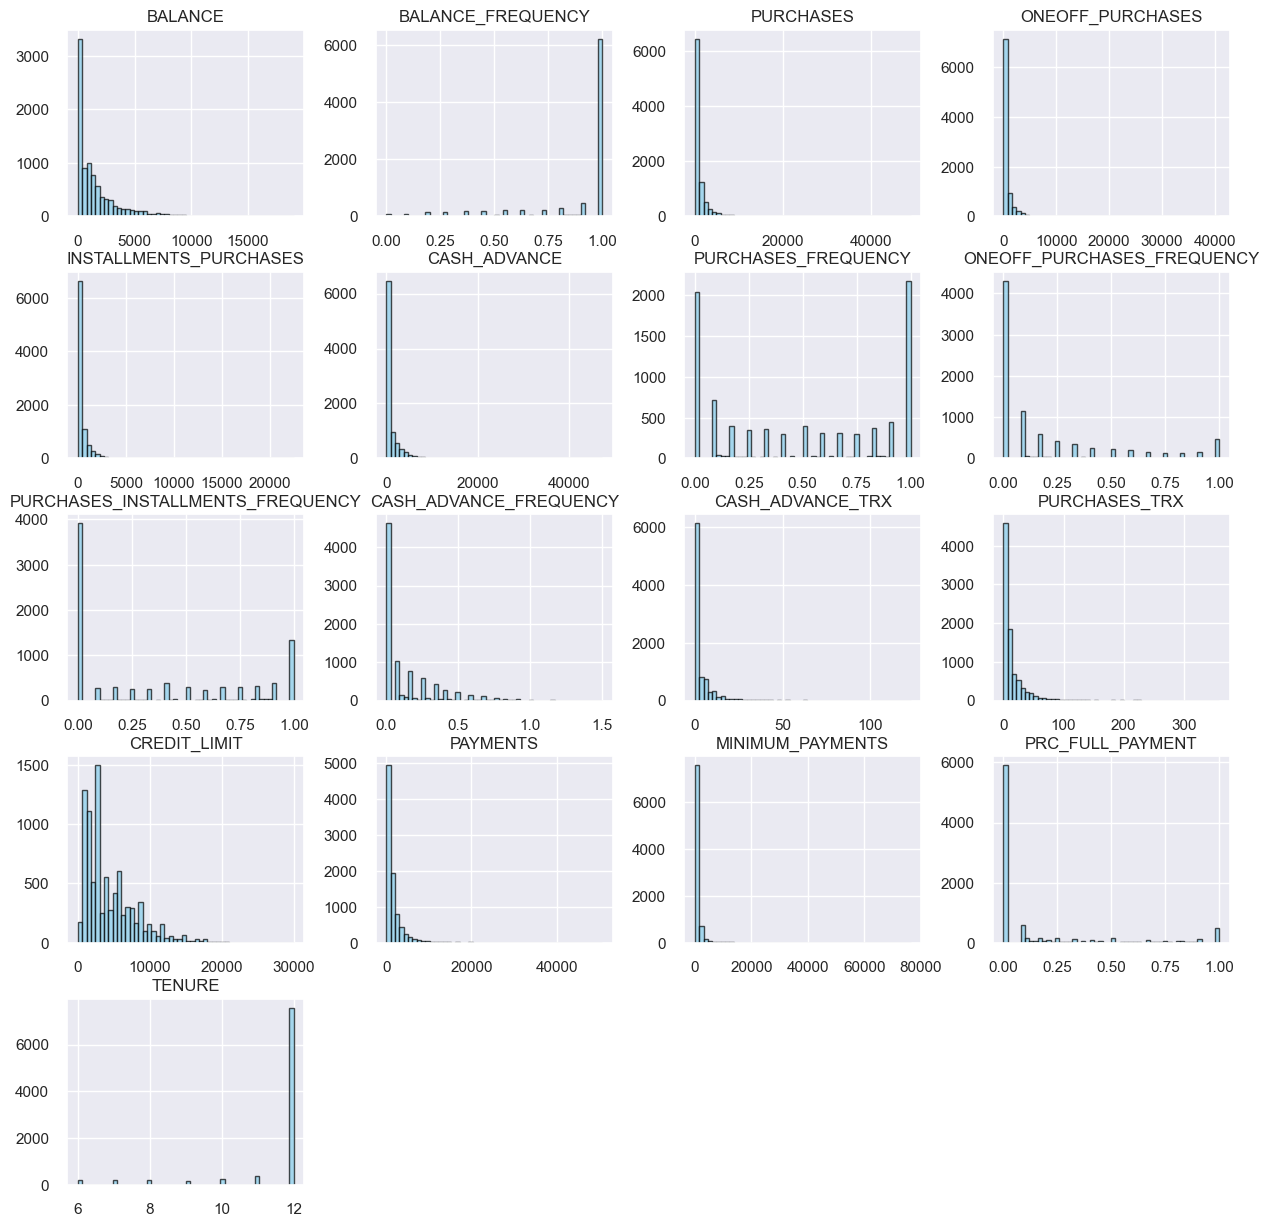

In [9]:
plt.figure(figsize=(20, 15))
df.hist(bins=50, color='skyblue', edgecolor='black', alpha=0.7)


plt.title("Distribution of Data")
plt.xlabel("Values")
plt.ylabel("Frequency")


plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.show()


In [10]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [11]:
df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

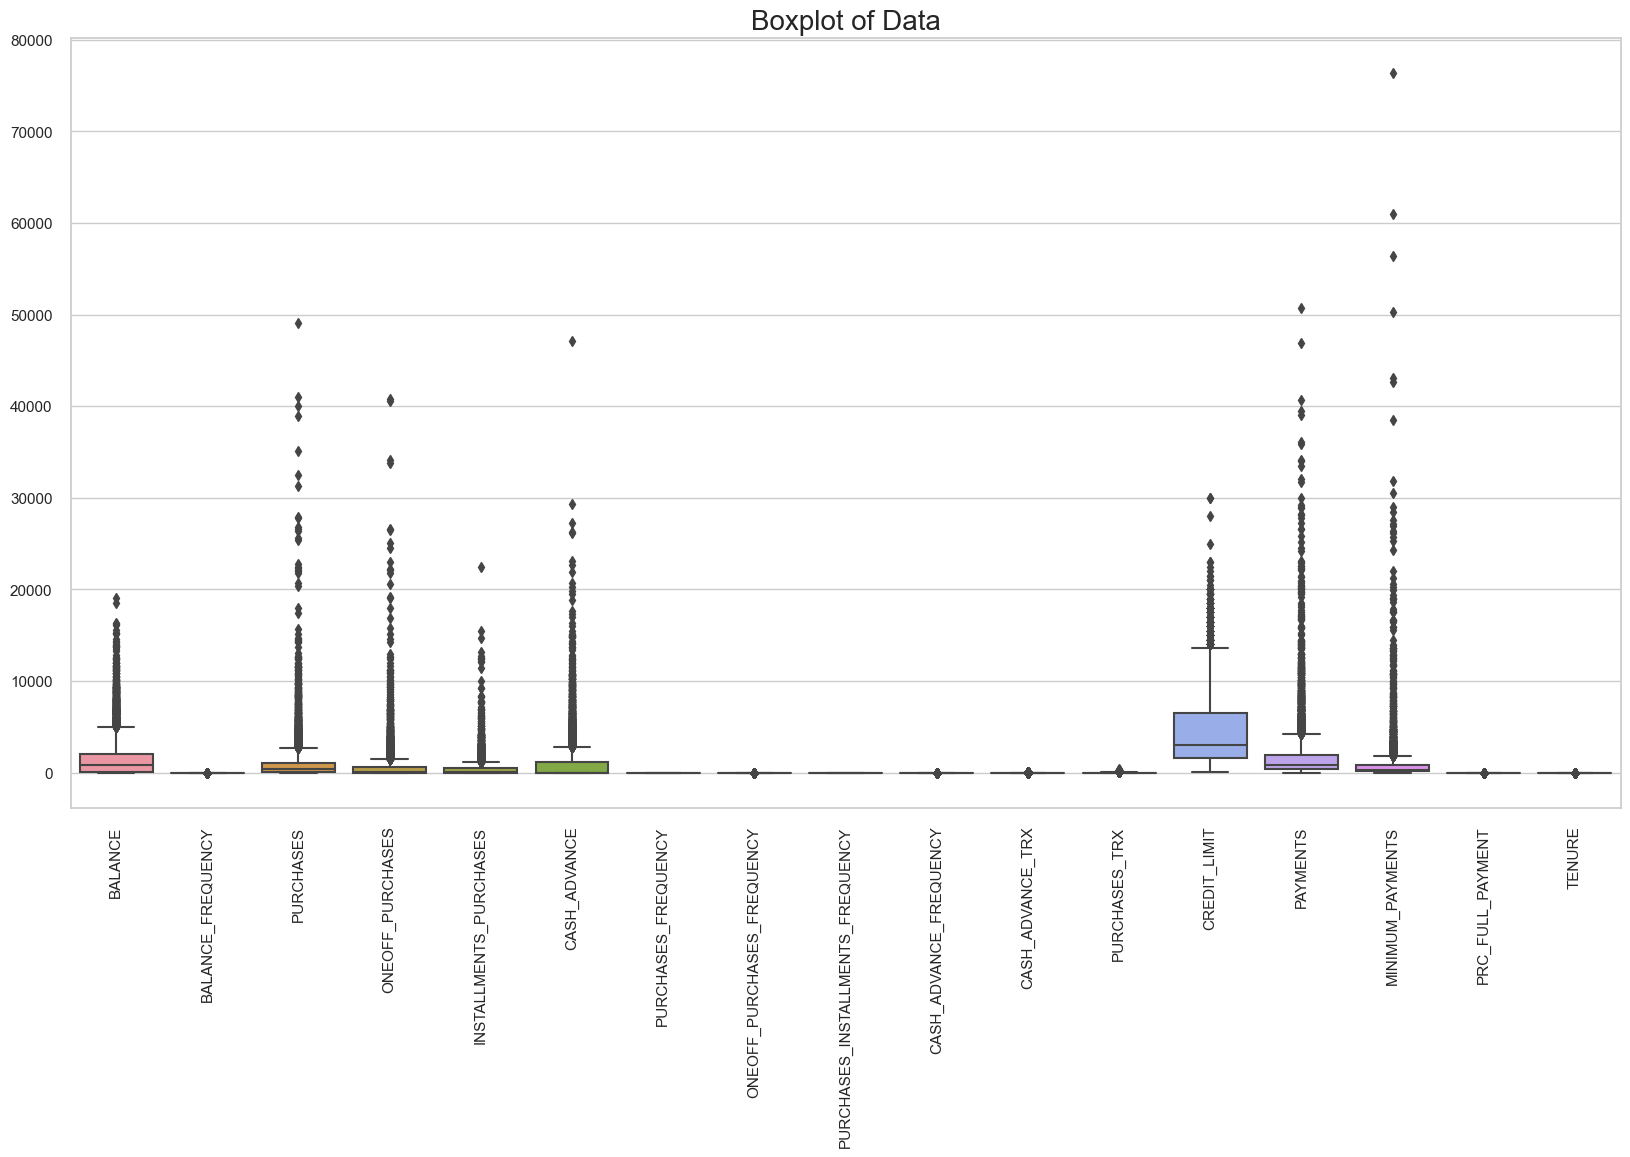

In [12]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
box_plot = sns.boxplot(data=df)
plt.title('Boxplot of Data', fontsize=20)
plt.xticks(rotation=90)
plt.show()


# Data Preprocessing

### *Handling Missing Values*

In [13]:
from sklearn.impute import KNNImputer

Imputer=KNNImputer(n_neighbors=3)
df['MINIMUM_PAYMENTS']=Imputer.fit_transform(df[['MINIMUM_PAYMENTS']])
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].median(),inplace=True)

### *Data Scaling*

In [14]:
sc = StandardScaler()
df_scal = sc.fit_transform(df)

### *Log Transformation*

In [15]:
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for col in cols:
     df[col] = np.log(1 + df[col])

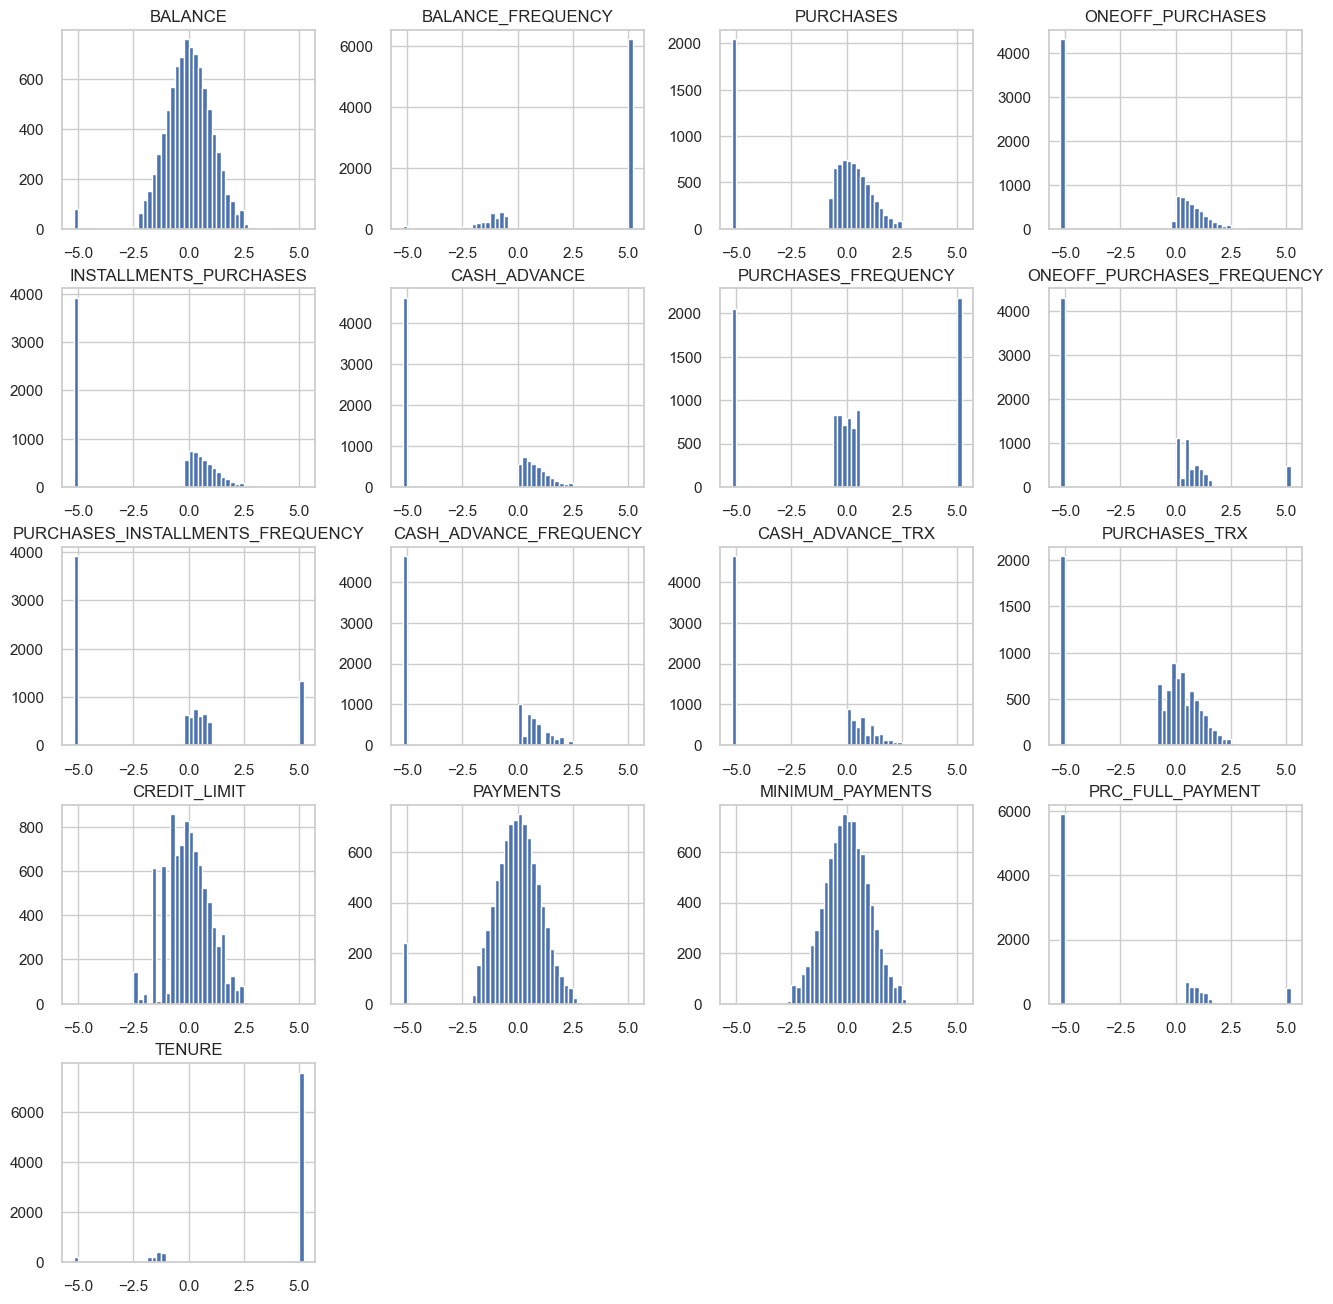

In [16]:
#solution 
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
df_trans = trans.fit_transform(df)
#test 
df_quan = pd.DataFrame(df_trans,columns=df.columns)
# histograms of the variables
%matplotlib inline
df_quan.hist(bins=50, figsize=(16,16))
plt.show()

### PCA

In [35]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)




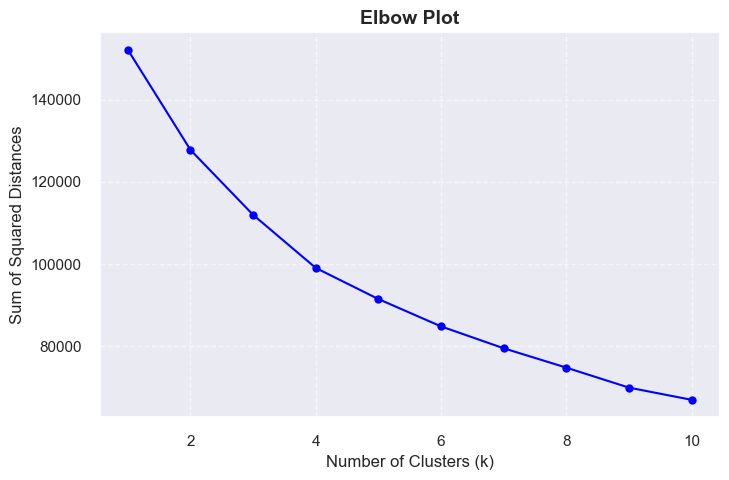

In [36]:
distance_in_cluster = []
#k number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scal)
    distance_in_cluster.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), distance_in_cluster, marker='o', linestyle='-', color='blue')
plt.title('Elbow Plot', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


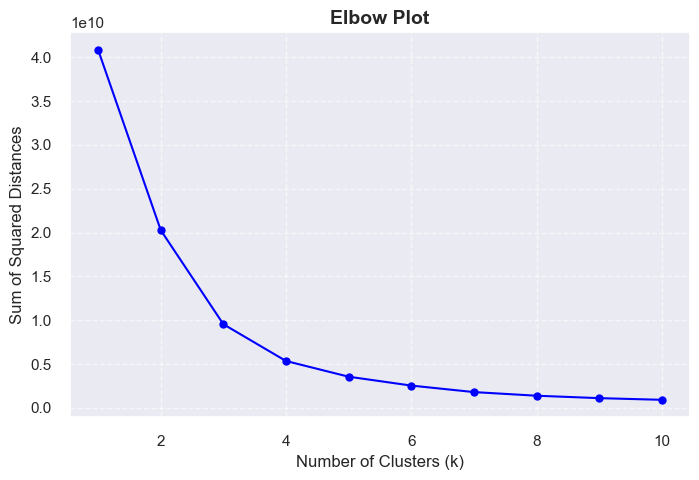

In [37]:
#usin df_pca
distance_in_cluster = []
#k number of clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_pca)
    distance_in_cluster.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), distance_in_cluster, marker='o', linestyle='-', color='blue')
plt.title('Elbow Plot', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Sum of Squared Distances', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


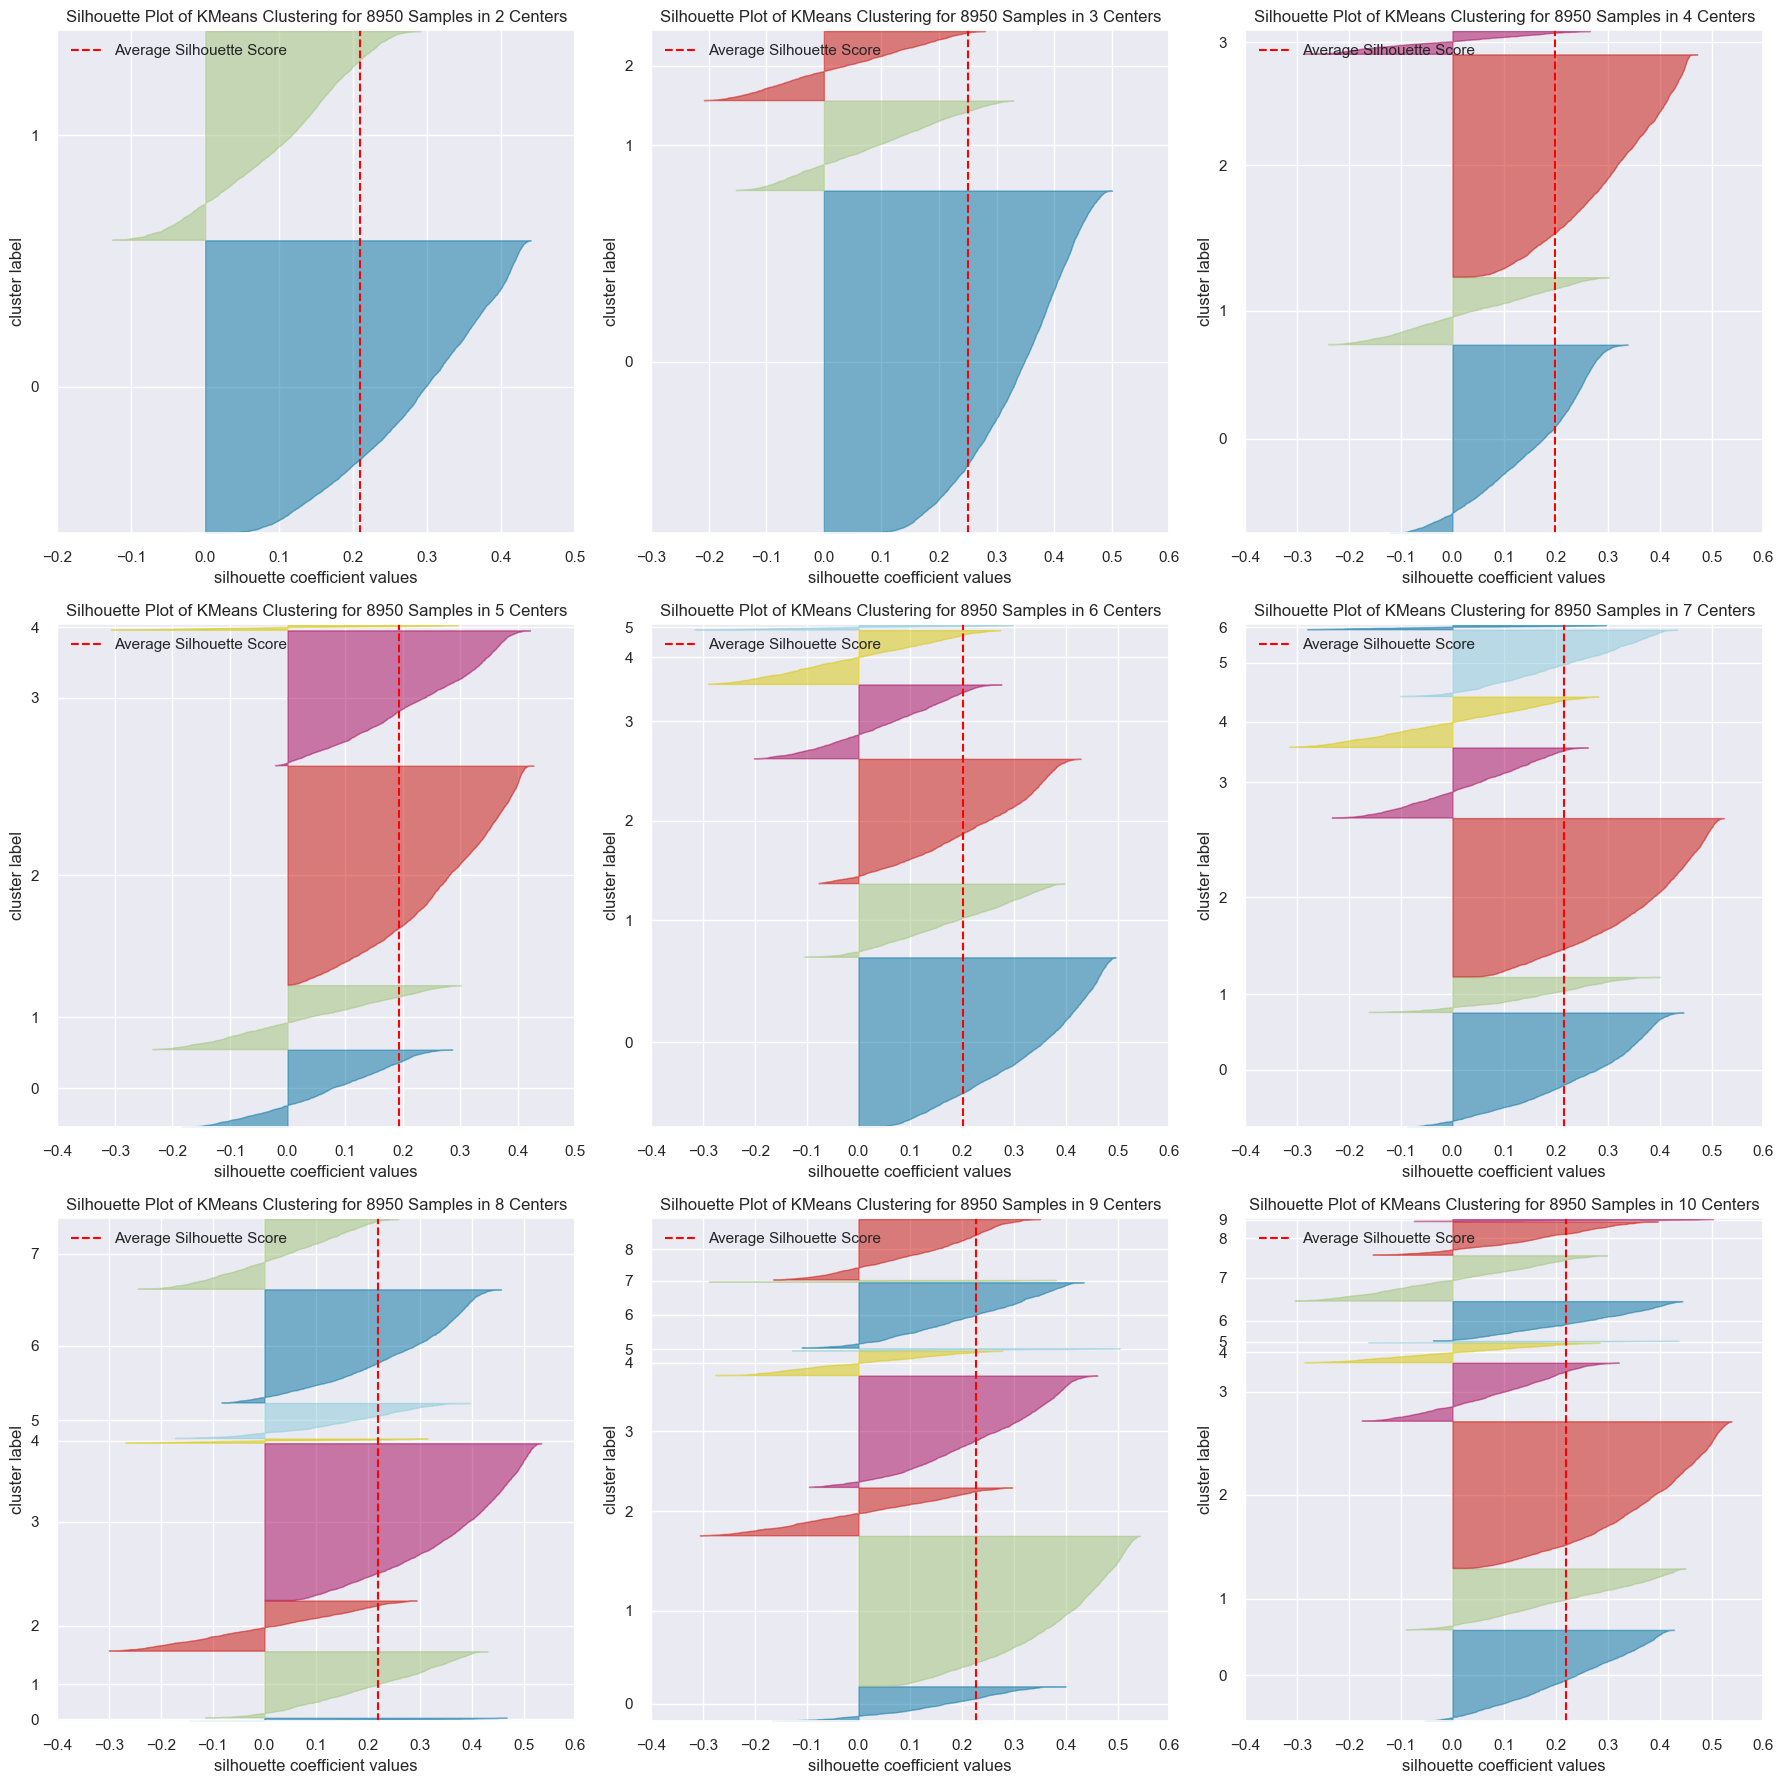

In [38]:
sns.set_theme()

cluster_range = range(2, 11)
n_cols = 3  
n_rows = (len(cluster_range) - 1) // n_cols + 1  

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*6))

for idx, i in enumerate(cluster_range):
    ax = axs[idx // n_cols, idx % n_cols]
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    visualizer.fit(df_scal)
    visualizer.finalize()

# Remove empty subplots
if len(cluster_range) < n_rows * n_cols:
    for idx in range(len(cluster_range), n_rows * n_cols):
        fig.delaxes(axs.flatten()[idx])

plt.tight_layout()
plt.show()

#### Silhouette Score: the goodness of a clustering technique.
(-1 no clustering, 0 distance between clusters not significant, 1 clusters are well apart)

#### Davies-Bouldin score : ratio between the cluster scatter and the cluster's separation.
(the closer to 0 the better)

# All Unsupervised Algorithms

In [39]:
KM = KMeans(n_clusters=3, random_state=23, init = 'random', n_init=10, max_iter=1000)
predicted_KM = KM.fit_predict(df_scal)

db_index = round(davies_bouldin_score(df_scal, predicted_KM), 3)
s_score = round(silhouette_score(df_scal, predicted_KM), 3)


print('Silhouette Score: ',s_score)
print('Davies-Bouldin Index: ',db_index)



Silhouette Score:  0.251
Davies-Bouldin Index:  1.597


### kmean with PCA

In [22]:
KM.fit(df_pca)

s_score_pca = silhouette_score(df_pca, KM.labels_)
db_index_pca = davies_bouldin_score(df_pca, KM.labels_)

# Print the scores
print('Silhouette score of model using PCA is ' + str(s_score_pca))
print('Davies Bouldin score of model using PCA is ' + str(db_index_pca))




Silhouette score of model using PCA is 0.7983799334736521
Davies Bouldin score of model using PCA is 0.45715788481971953


In [23]:
y_kmeans = KM.predict(df_pca)
KM.labels_
kmeanDF = pd.DataFrame(KM.labels_)
print(kmeanDF.value_counts())
print(np.unique(y_kmeans))

2    8195
0     731
1      24
dtype: int64
[0 1 2]


## DBSCAN

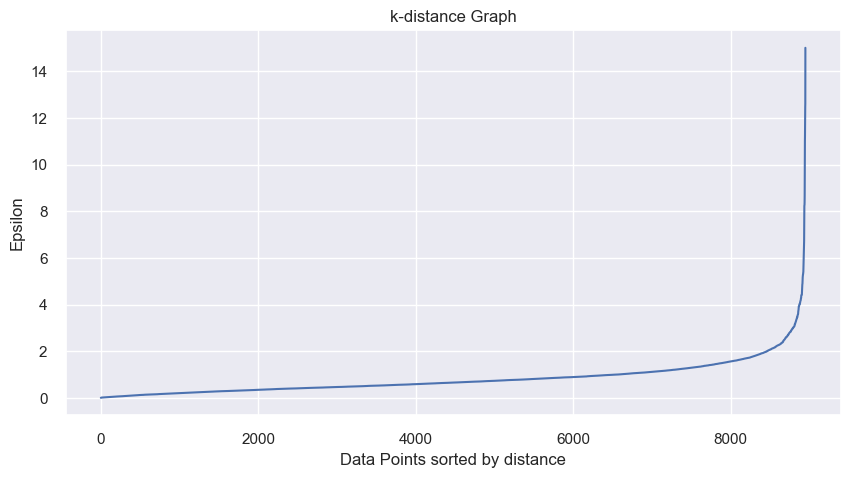

In [26]:
from sklearn.neighbors import NearestNeighbors


k = 3
nbrs = NearestNeighbors(n_neighbors=k).fit(df_scal)
distances, indices = nbrs.kneighbors(df_scal)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


In [27]:
DB = DBSCAN (eps =3 , min_samples = 9 , n_jobs = -1)
predicted_DB = DB.fit_predict(df_scal)

db_index = round(davies_bouldin_score(df_scal, predicted_DB), 3)
s_score = round(silhouette_score(df_scal, predicted_DB), 3)


print('Silhouette Score: ',s_score)
print('Davies-Bouldin Index: ',db_index)


Silhouette Score:  0.614
Davies-Bouldin Index:  1.713


### DBSCAN with pca

In [28]:
clustering_PCA = DBSCAN(eps=3, min_samples=4).fit(df_pca)

s_score_pca = silhouette_score(df_pca, clustering_PCA.labels_)
db_index_pca = davies_bouldin_score(df_pca, clustering_PCA.labels_)

print('Silhouette score of model using PCA is ' + str(s_score_pca))
print('Davies Bouldin score of model using PCA is ' + str(db_index_pca))


Silhouette score of model using PCA is -0.1599085128741853
Davies Bouldin score of model using PCA is 3.5460540110945002


## Agglomerative Clustering

In [29]:
AC = AgglomerativeClustering(n_clusters = 3)
predicted_AC = AC.fit_predict(df_scal)

db_index = round(davies_bouldin_score(df_scal, predicted_AC), 3)
s_score = round(silhouette_score(df_scal, predicted_AC), 3)


print('Silhouette Score: ',s_score)
print('Davies-Bouldin Index: ',db_index)

Silhouette Score:  0.173
Davies-Bouldin Index:  1.798


### Agglomerative Clustering with pca

In [30]:
hier_cluster_PCA = AgglomerativeClustering(n_clusters=3, linkage='complete')
hier_clustering_PCA = hier_cluster_PCA.fit_predict(df_pca)


s_score_pca = silhouette_score(df_pca, hier_clustering_PCA)
db_index_pca = davies_bouldin_score(df_pca, hier_clustering_PCA)

# Print the scores
print('Silhouette score of model using PCA is ' + str(s_score_pca))
print('Davies Bouldin score of model using PCA is ' + str(db_index_pca))


Silhouette score of model using PCA is 0.938015979245534
Davies Bouldin score of model using PCA is 0.3746179659698063


## Finally lets visualize the clusters from KMeans

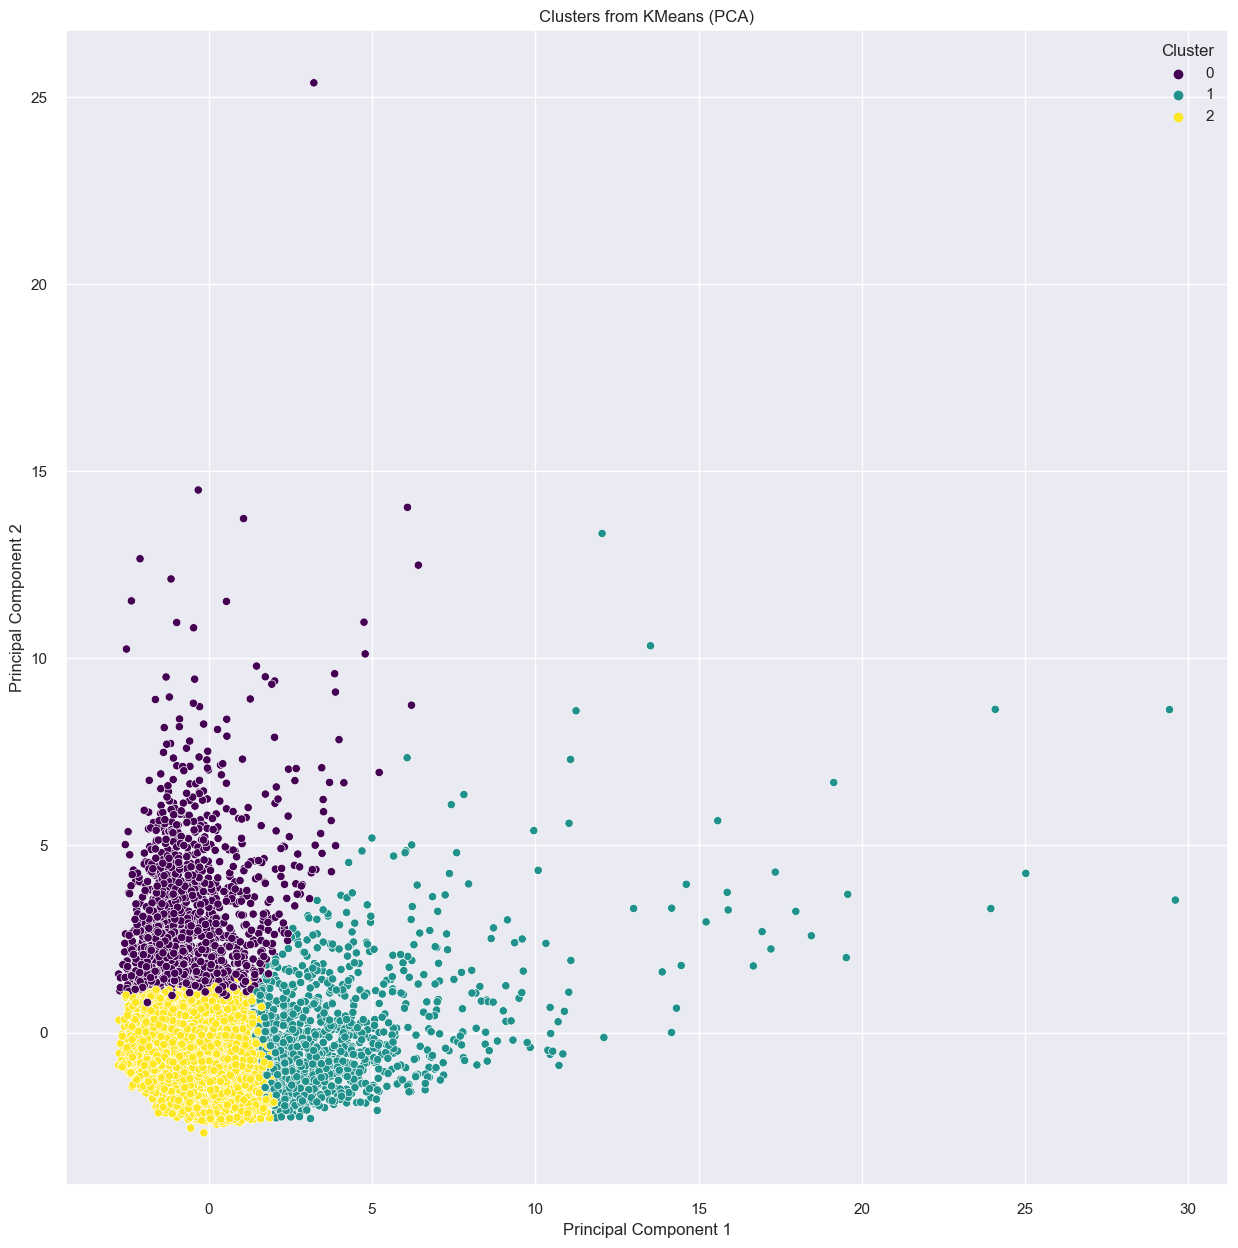

In [31]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scal)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = predicted_KM

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters from KMeans (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##  visualize the clusters from Agglomerative Clustering

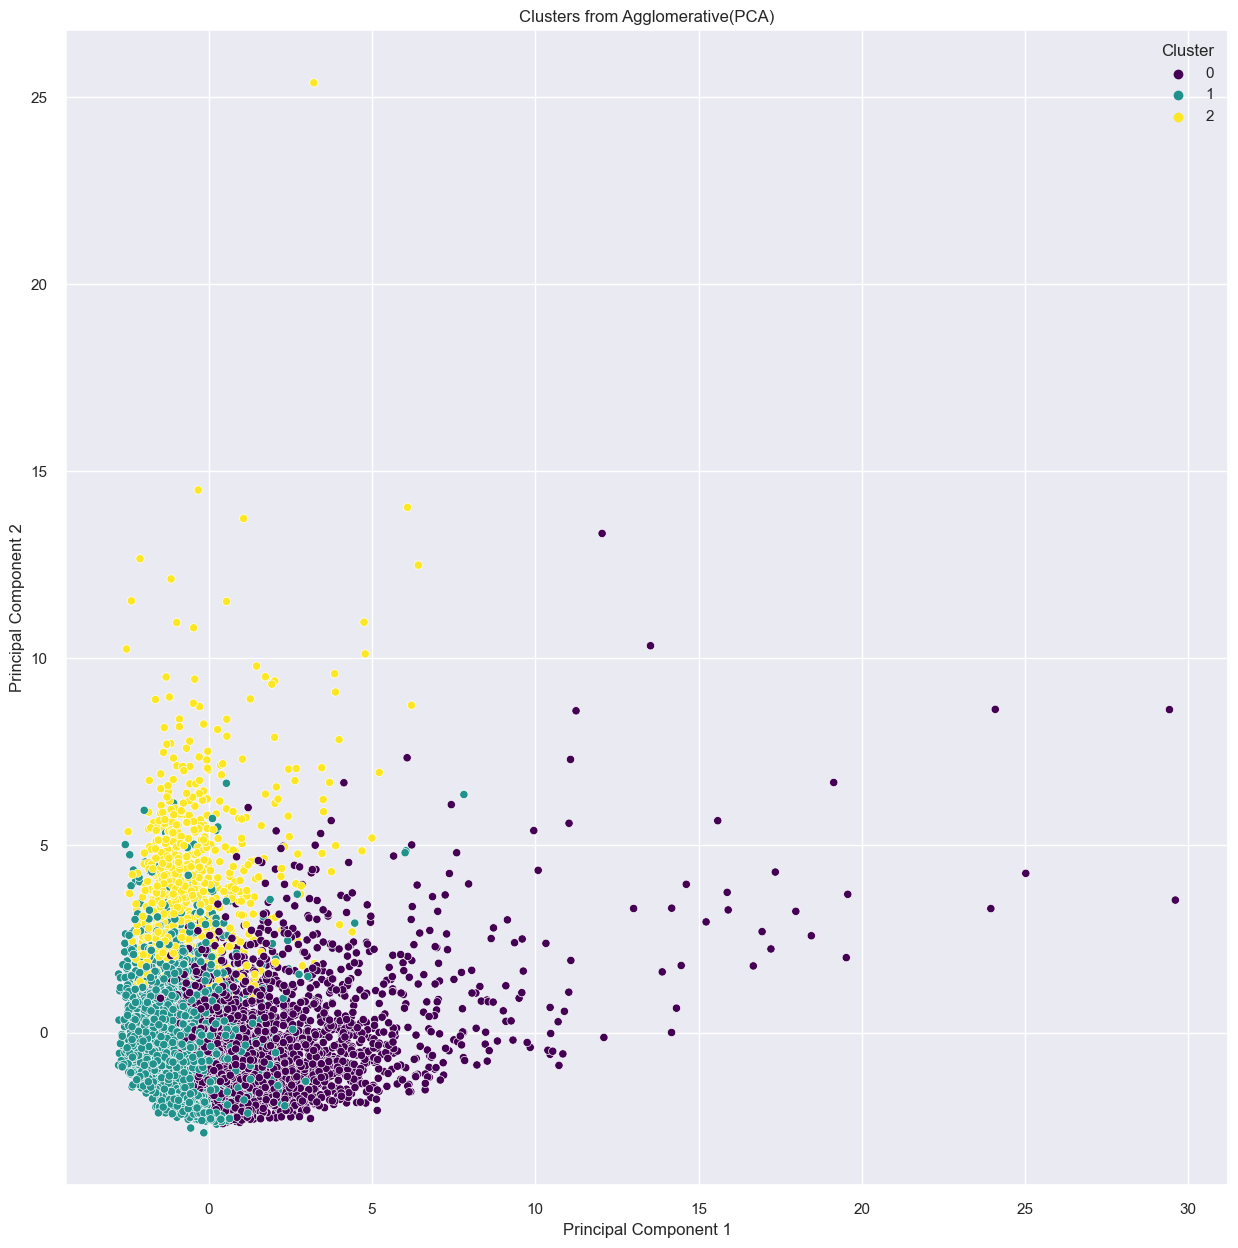

In [32]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scal)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = predicted_AC

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters from Agglomerative(PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

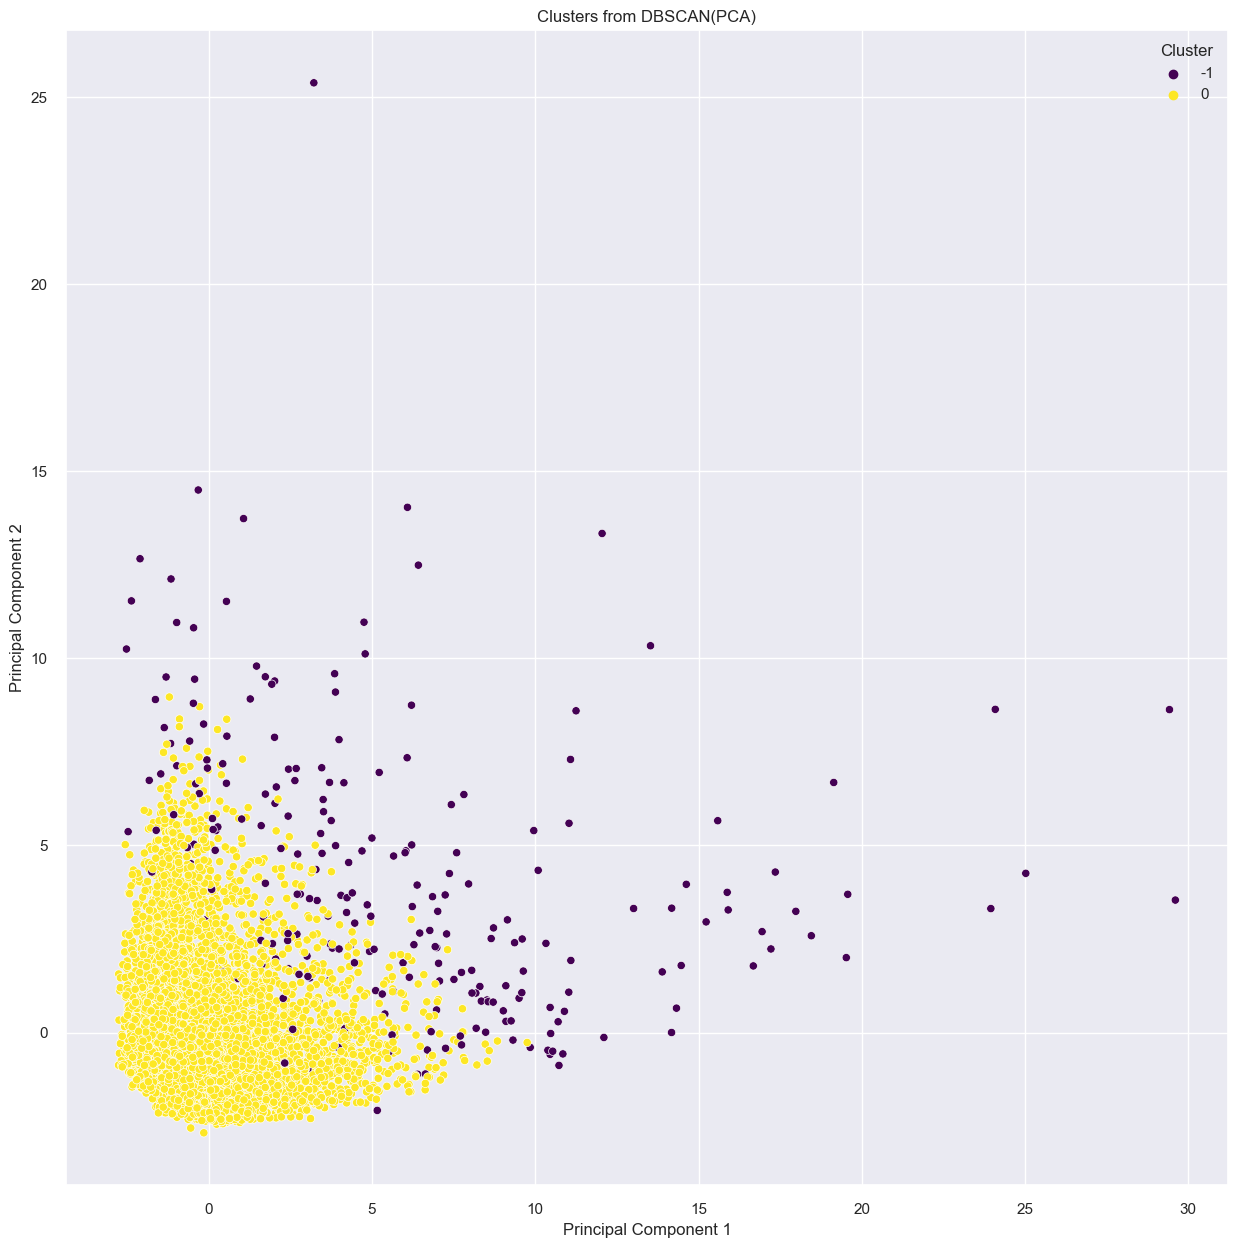

In [43]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(df_scal)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = predicted_DB

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters from DBSCAN(PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()